In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from scipy.signal import savgol_filter

In [2]:
# model = keras.models.load_model('model/LSTM_a9_03_std.h5')
model = keras.models.load_model('model/LSTM_a9_03_std_sv85_2.h5')

In [3]:
# df = pd.read_csv('data/RAW_A9_01/a9_clean.csv', header=None)
df = pd.read_csv('data/RAW_A9_02/a9_02_above.csv', header=None)
# df = pd.read_csv('data/RAW_A9_03/a9_03_clean.csv', header=None)
# df = pd.read_csv('data/train_data_UU.csv', header=None)

In [4]:
x_test, y_test = df.iloc[:, :-1], df.iloc[:, -1]

In [5]:
y_test_index = y_test.index

# LabelEncoder
LABELS = ['nothing', 'passing', 'touching']
le = LabelEncoder()
le.fit(LABELS)

# Standardize
sc = StandardScaler()
sc.fit(x_test)
x_test = sc.transform(x_test)

# savgol
if isinstance(x_test, pd.DataFrame):
    for i in range(len(x_test)):
        row = x_test.iloc[i]
        x_test.iloc[i] = savgol_filter(row, 85, 2)
else:
    for i in range(len(x_test)):
        row = x_test[i]
        x_test[i] = savgol_filter(row, 85, 2)

In [6]:
batch_size = 20
time_step = 1
feature_dim = x_test.shape[1]

# reshape input to be 3D [samples, timesteps, features]
if isinstance(x_test, np.ndarray):
    x_test_reshape = x_test.reshape((x_test.shape[0], time_step, x_test.shape[1]))
else:
    x_test_reshape = x_test.values.reshape((x_test.shape[0], time_step, x_test.shape[1]))

In [7]:
y_pred = model.predict(x_test_reshape, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = le.inverse_transform(y_pred_bool)


print(classification_report(y_test, y_pred, zero_division=1))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred, labels=LABELS))
print()

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     nothing       0.74      0.80      0.77       220
     passing       0.13      0.04      0.06        49
    touching       0.18      0.26      0.21        39

    accuracy                           0.61       308
   macro avg       0.35      0.36      0.35       308
weighted avg       0.57      0.61      0.58       308

Confusion matrix:
[[175   9  36]
 [ 37   2  10]
 [ 25   4  10]]



## print mistake graphs

============== Row:000 Index:0 ============== (True:nothing Predict:touching )


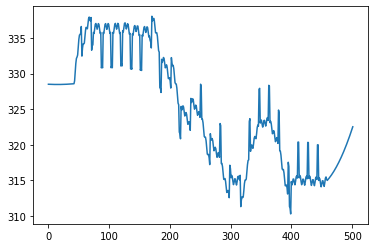

============== Row:002 Index:2 ============== (True:nothing Predict:touching )


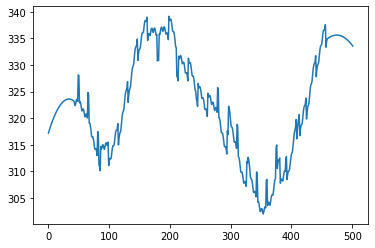

============== Row:004 Index:4 ============== (True:nothing Predict:touching )


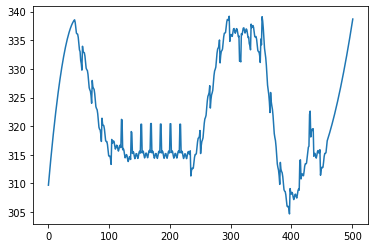

============== Row:008 Index:8 ============== (True:nothing Predict:touching )


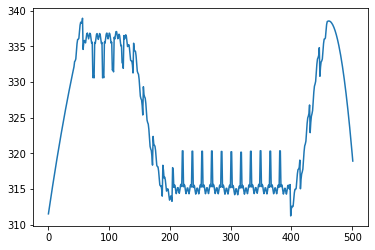

============== Row:011 Index:11 ============== (True:nothing Predict:touching )


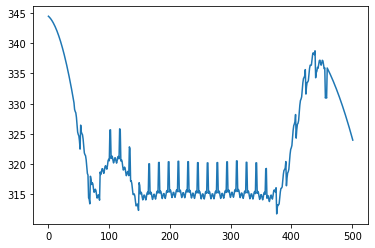

============== Row:012 Index:12 ============== (True:nothing Predict:touching )


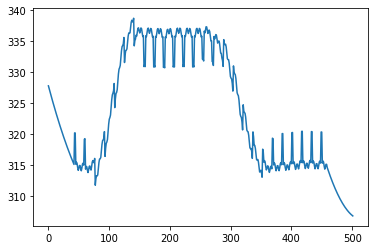

============== Row:013 Index:13 ============== (True:nothing Predict:touching )


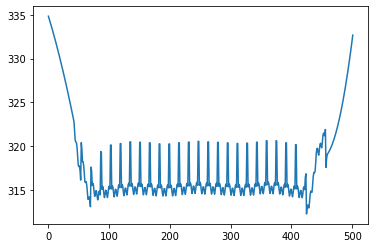

============== Row:014 Index:14 ============== (True:nothing Predict:touching )


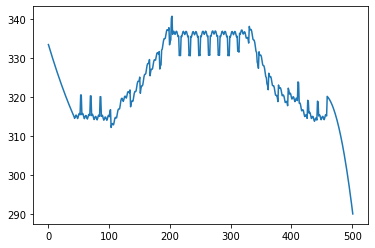

============== Row:015 Index:15 ============== (True:nothing Predict:touching )


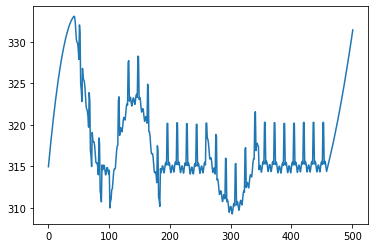

============== Row:017 Index:17 ============== (True:nothing Predict:touching )


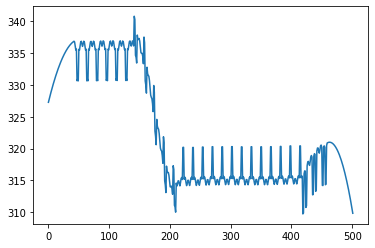

============== Row:022 Index:22 ============== (True:nothing Predict:touching )


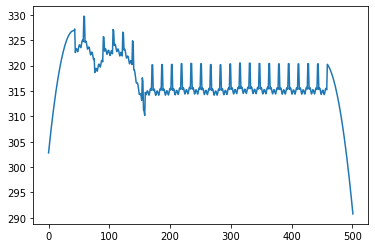

============== Row:023 Index:23 ============== (True:nothing Predict:touching )


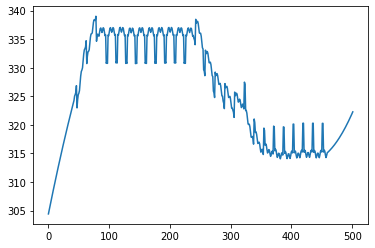

============== Row:025 Index:25 ============== (True:nothing Predict:touching )


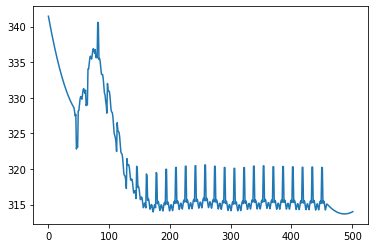

============== Row:026 Index:26 ============== (True:nothing Predict:touching )


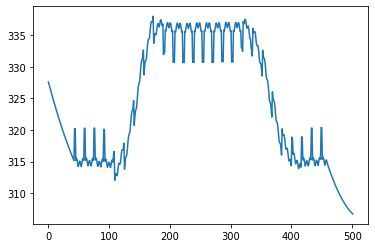

============== Row:027 Index:27 ============== (True:nothing Predict:touching )


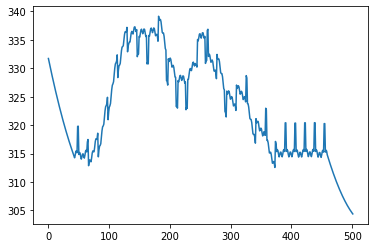

============== Row:028 Index:28 ============== (True:nothing Predict:touching )


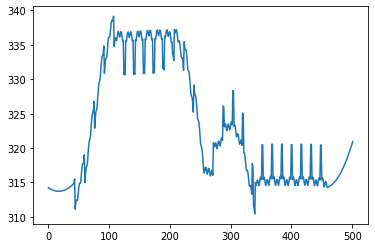

============== Row:029 Index:29 ============== (True:nothing Predict:touching )


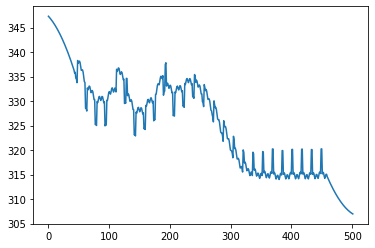

============== Row:031 Index:31 ============== (True:nothing Predict:touching )


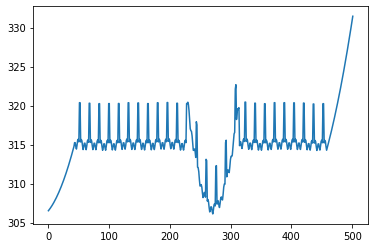

============== Row:036 Index:36 ============== (True:passing Predict:touching )


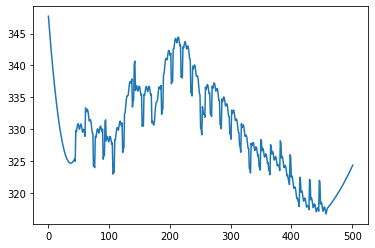

============== Row:039 Index:39 ============== (True:passing Predict:nothing )


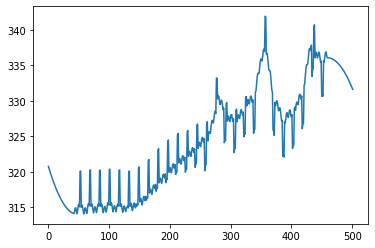

============== Row:041 Index:41 ============== (True:nothing Predict:touching )


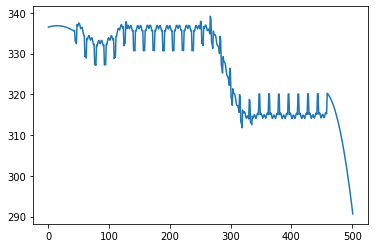

============== Row:043 Index:43 ============== (True:nothing Predict:touching )


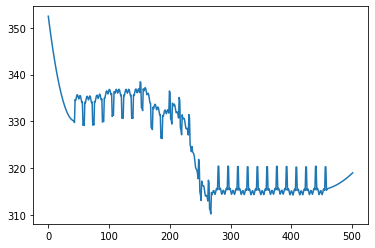

============== Row:045 Index:45 ============== (True:passing Predict:nothing )


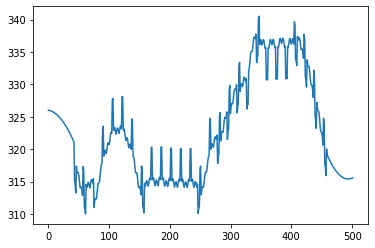

============== Row:046 Index:46 ============== (True:passing Predict:nothing )


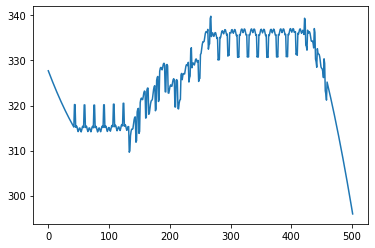

============== Row:047 Index:47 ============== (True:passing Predict:touching )


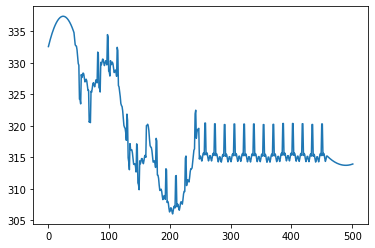

============== Row:048 Index:48 ============== (True:passing Predict:nothing )


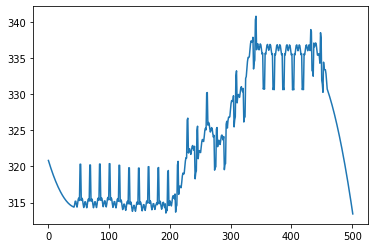

============== Row:049 Index:49 ============== (True:passing Predict:nothing )


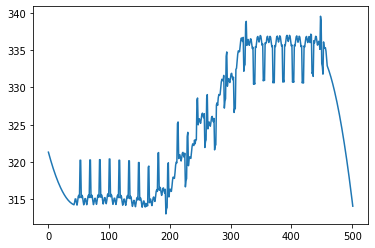

============== Row:050 Index:50 ============== (True:passing Predict:touching )


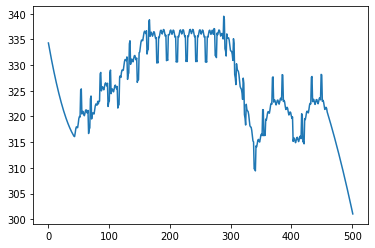

============== Row:051 Index:51 ============== (True:passing Predict:touching )


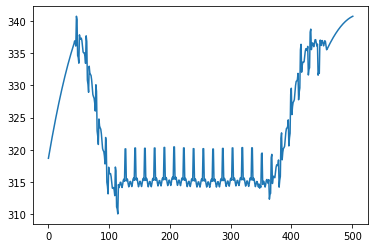

============== Row:053 Index:53 ============== (True:passing Predict:touching )


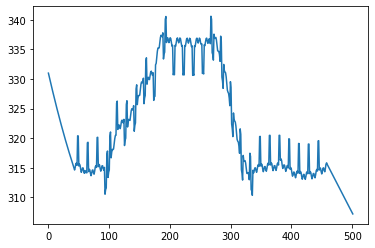

============== Row:054 Index:54 ============== (True:passing Predict:touching )


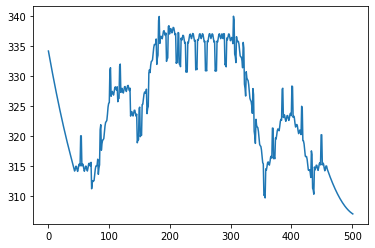

============== Row:055 Index:55 ============== (True:passing Predict:touching )


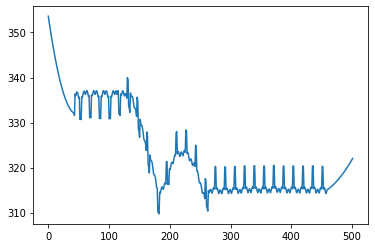

============== Row:056 Index:56 ============== (True:passing Predict:touching )


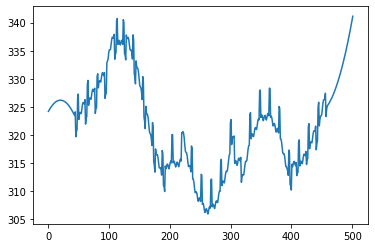

============== Row:057 Index:57 ============== (True:passing Predict:nothing )


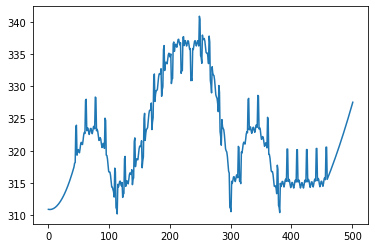

============== Row:059 Index:59 ============== (True:passing Predict:nothing )


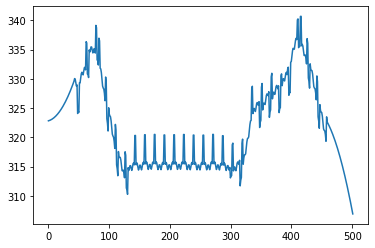

============== Row:060 Index:60 ============== (True:passing Predict:nothing )


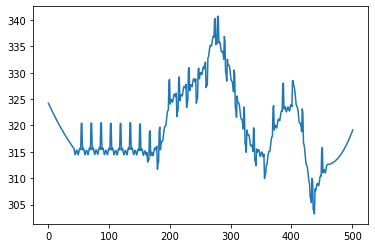

============== Row:061 Index:61 ============== (True:passing Predict:nothing )


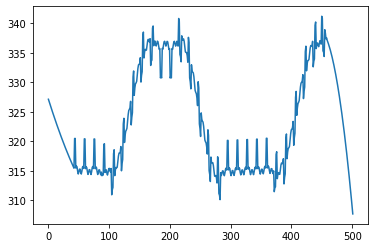

============== Row:062 Index:62 ============== (True:passing Predict:nothing )


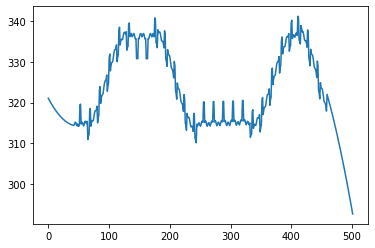

============== Row:063 Index:63 ============== (True:nothing Predict:touching )


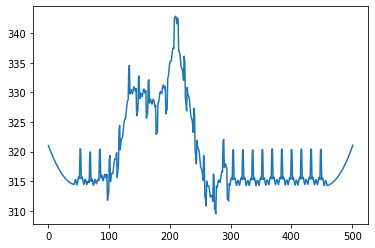

============== Row:066 Index:66 ============== (True:touching Predict:passing )


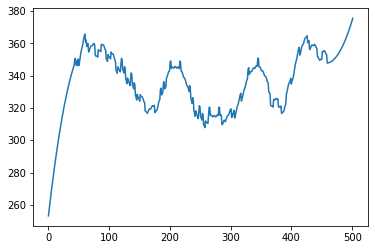

============== Row:068 Index:68 ============== (True:touching Predict:nothing )


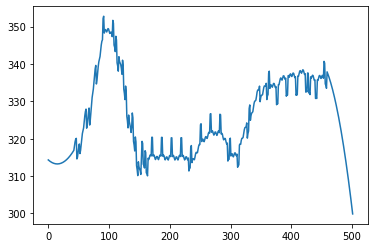

============== Row:070 Index:70 ============== (True:touching Predict:passing )


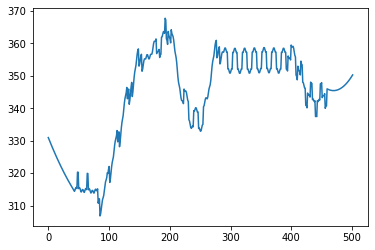

============== Row:072 Index:72 ============== (True:touching Predict:nothing )


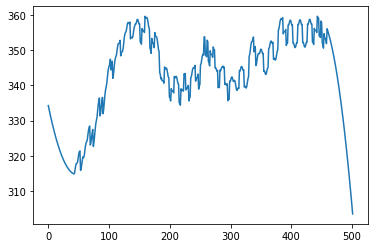

============== Row:075 Index:75 ============== (True:touching Predict:nothing )


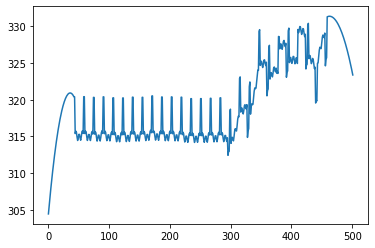

============== Row:079 Index:79 ============== (True:nothing Predict:touching )


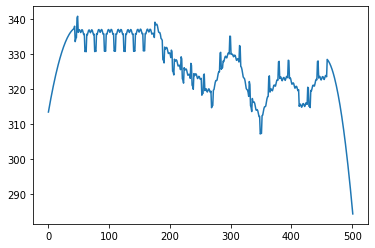

============== Row:080 Index:80 ============== (True:nothing Predict:touching )


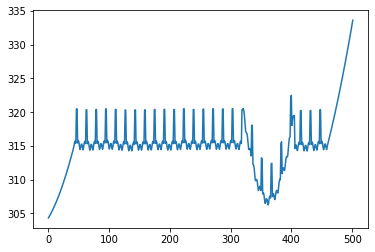

============== Row:085 Index:85 ============== (True:nothing Predict:touching )


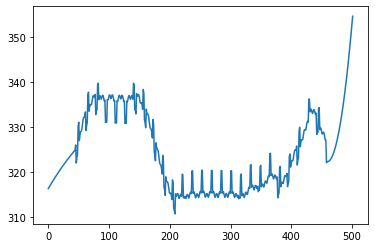

============== Row:097 Index:97 ============== (True:nothing Predict:touching )


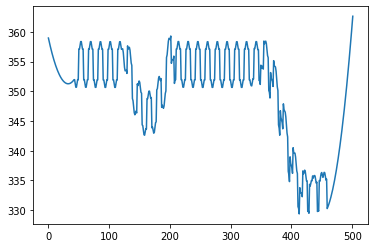

============== Row:108 Index:108 ============== (True:nothing Predict:passing )


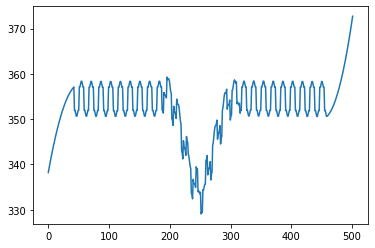

============== Row:114 Index:114 ============== (True:nothing Predict:touching )


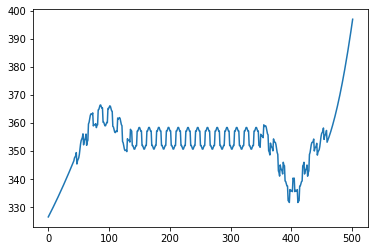

============== Row:117 Index:117 ============== (True:nothing Predict:touching )


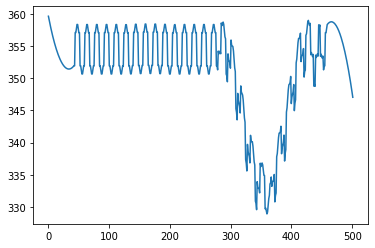

============== Row:118 Index:118 ============== (True:nothing Predict:passing )


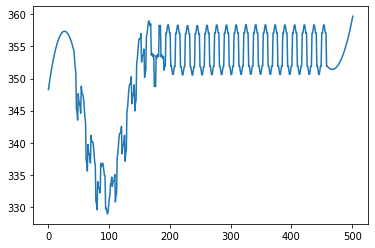

============== Row:120 Index:120 ============== (True:nothing Predict:touching )


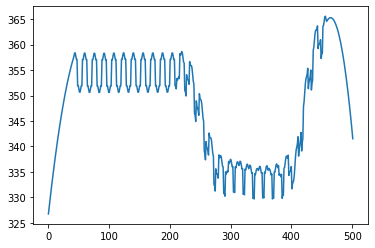

============== Row:121 Index:121 ============== (True:nothing Predict:passing )


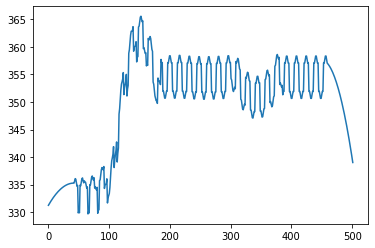

============== Row:131 Index:131 ============== (True:nothing Predict:touching )


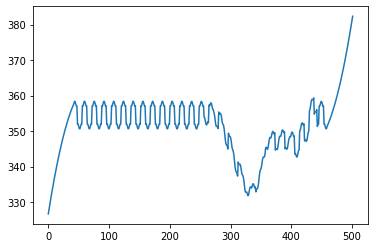

============== Row:134 Index:134 ============== (True:nothing Predict:touching )


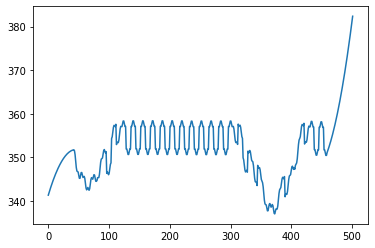

============== Row:136 Index:136 ============== (True:nothing Predict:touching )


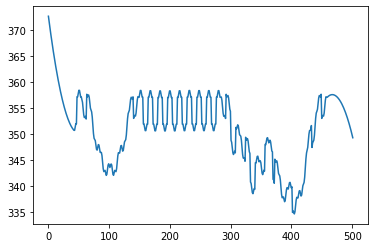

============== Row:145 Index:145 ============== (True:passing Predict:nothing )


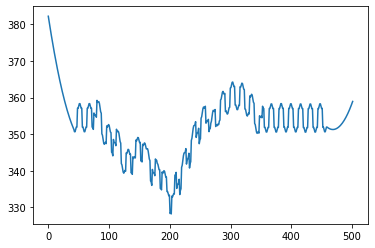

============== Row:146 Index:146 ============== (True:passing Predict:nothing )


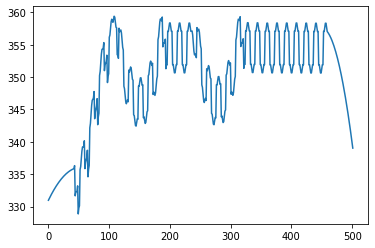

============== Row:148 Index:148 ============== (True:passing Predict:nothing )


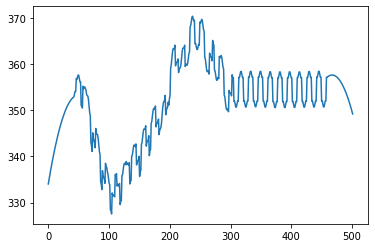

============== Row:149 Index:149 ============== (True:passing Predict:nothing )


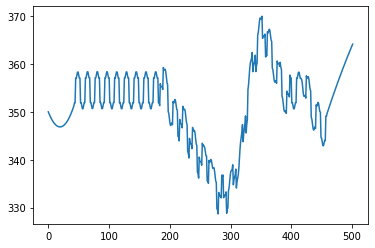

============== Row:150 Index:150 ============== (True:passing Predict:nothing )


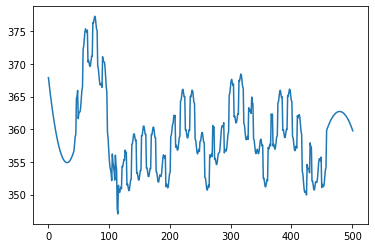

============== Row:151 Index:151 ============== (True:passing Predict:nothing )


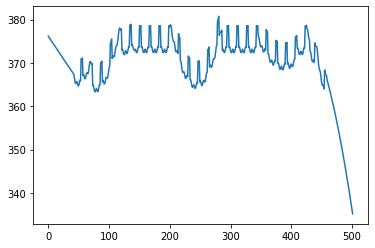

============== Row:152 Index:152 ============== (True:passing Predict:nothing )


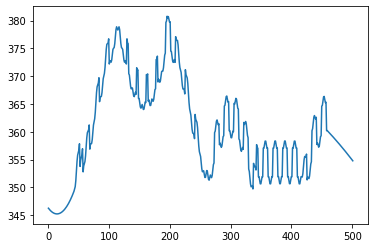

============== Row:153 Index:153 ============== (True:passing Predict:nothing )


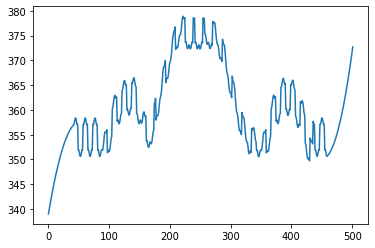

============== Row:154 Index:154 ============== (True:passing Predict:nothing )


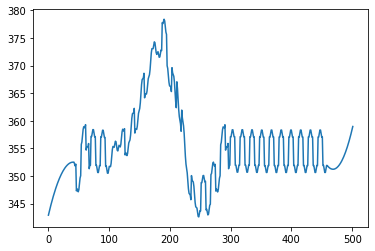

============== Row:155 Index:155 ============== (True:passing Predict:nothing )


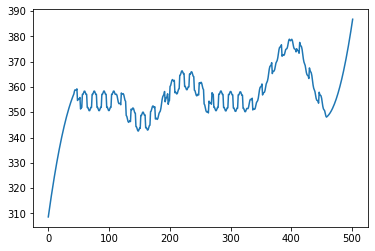

============== Row:163 Index:163 ============== (True:nothing Predict:passing )


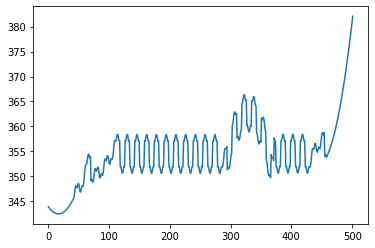

============== Row:191 Index:191 ============== (True:passing Predict:nothing )


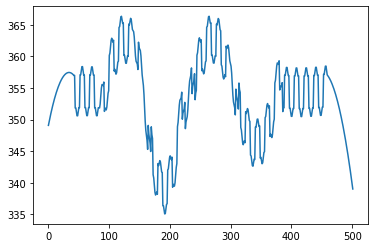

============== Row:192 Index:192 ============== (True:passing Predict:nothing )


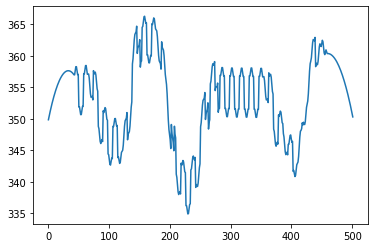

============== Row:193 Index:193 ============== (True:passing Predict:nothing )


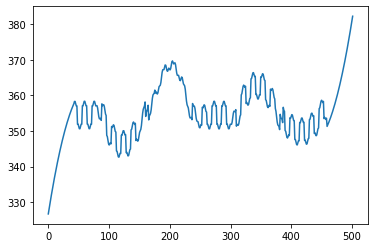

============== Row:194 Index:194 ============== (True:passing Predict:nothing )


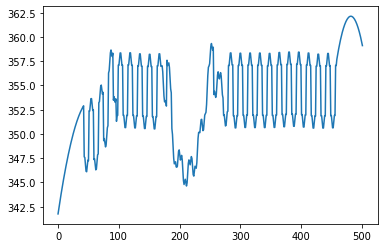

============== Row:196 Index:196 ============== (True:touching Predict:nothing )


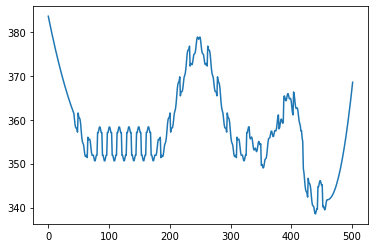

============== Row:197 Index:197 ============== (True:touching Predict:nothing )


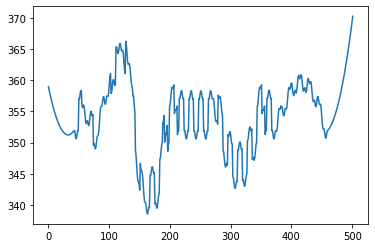

============== Row:198 Index:198 ============== (True:touching Predict:nothing )


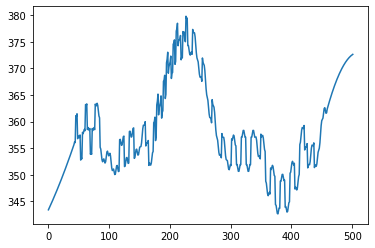

============== Row:199 Index:199 ============== (True:touching Predict:nothing )


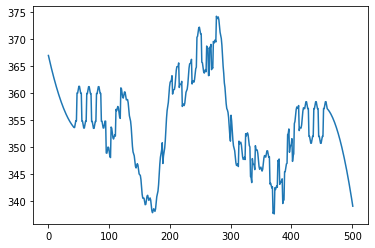

============== Row:200 Index:200 ============== (True:touching Predict:nothing )


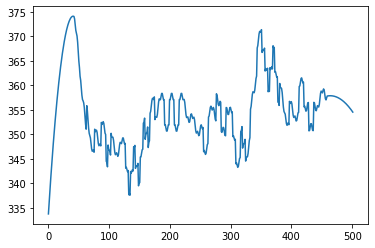

============== Row:201 Index:201 ============== (True:touching Predict:nothing )


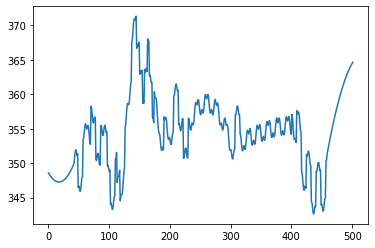

============== Row:207 Index:207 ============== (True:nothing Predict:touching )


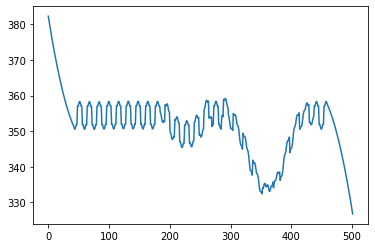

============== Row:213 Index:213 ============== (True:nothing Predict:passing )


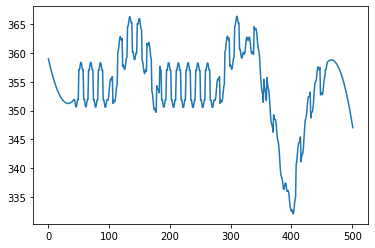

============== Row:219 Index:219 ============== (True:passing Predict:nothing )


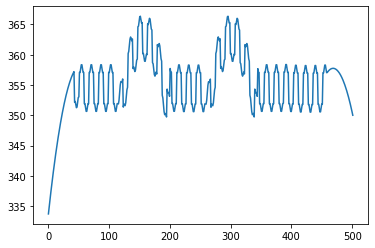

============== Row:220 Index:220 ============== (True:passing Predict:nothing )


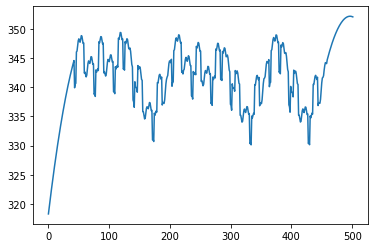

============== Row:221 Index:221 ============== (True:passing Predict:touching )


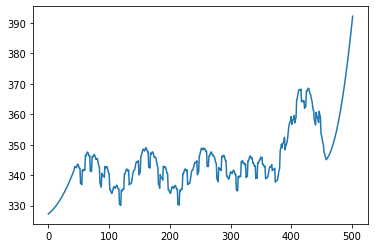

============== Row:222 Index:222 ============== (True:passing Predict:nothing )


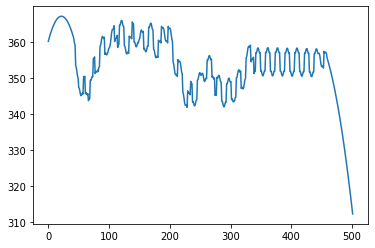

============== Row:223 Index:223 ============== (True:passing Predict:nothing )


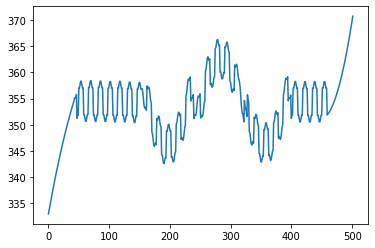

============== Row:225 Index:225 ============== (True:nothing Predict:touching )


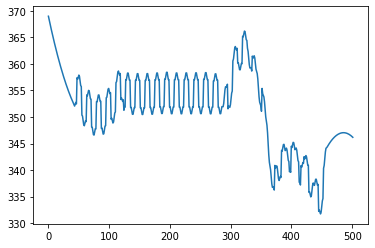

============== Row:232 Index:232 ============== (True:nothing Predict:touching )


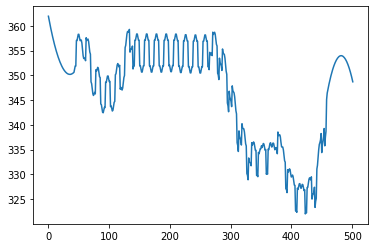

============== Row:233 Index:233 ============== (True:nothing Predict:passing )


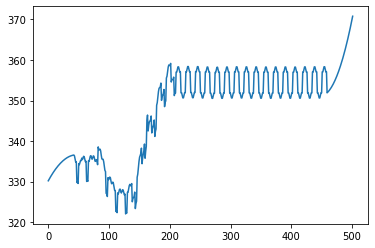

============== Row:238 Index:238 ============== (True:passing Predict:nothing )


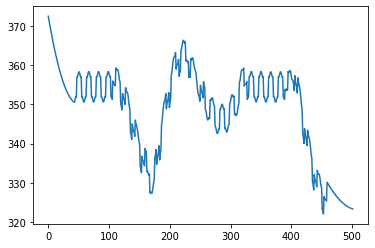

============== Row:240 Index:240 ============== (True:passing Predict:nothing )


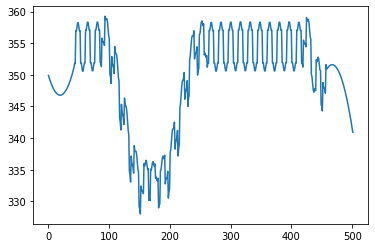

============== Row:241 Index:241 ============== (True:passing Predict:nothing )


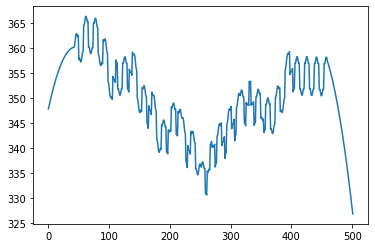

============== Row:242 Index:242 ============== (True:passing Predict:nothing )


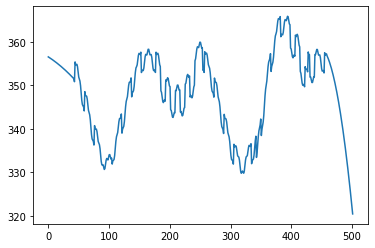

============== Row:243 Index:243 ============== (True:passing Predict:nothing )


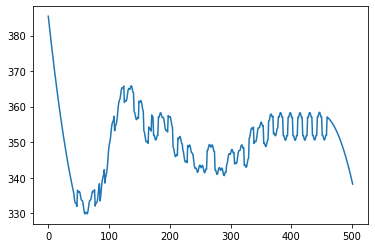

============== Row:244 Index:244 ============== (True:passing Predict:nothing )


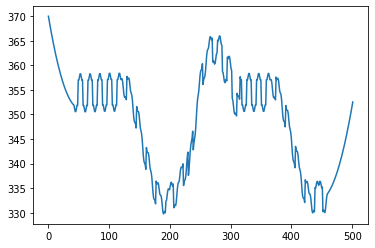

============== Row:245 Index:245 ============== (True:passing Predict:nothing )


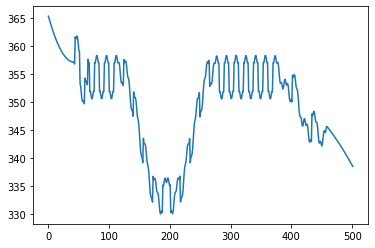

============== Row:253 Index:253 ============== (True:nothing Predict:touching )


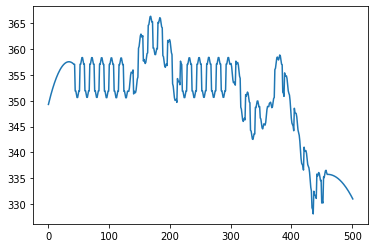

============== Row:255 Index:255 ============== (True:touching Predict:nothing )


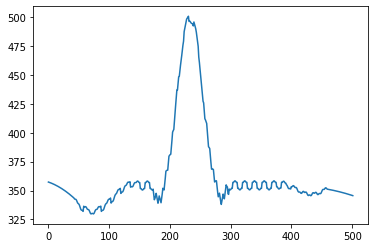

============== Row:257 Index:257 ============== (True:touching Predict:nothing )


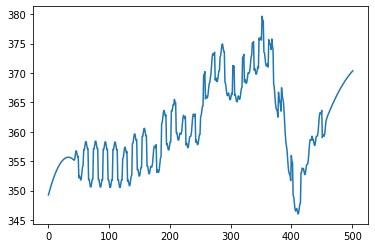

============== Row:258 Index:258 ============== (True:touching Predict:nothing )


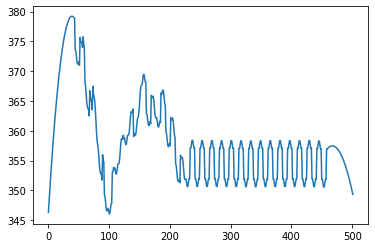

============== Row:260 Index:260 ============== (True:touching Predict:nothing )


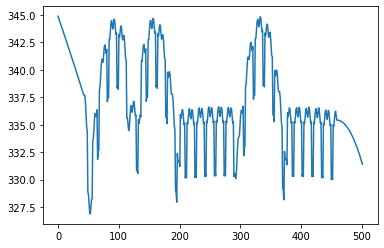

============== Row:261 Index:261 ============== (True:touching Predict:passing )


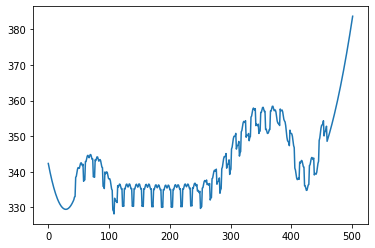

============== Row:267 Index:267 ============== (True:nothing Predict:passing )


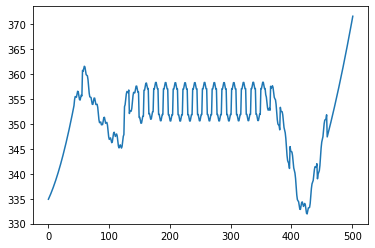

============== Row:268 Index:268 ============== (True:nothing Predict:passing )


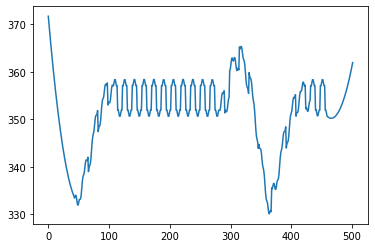

============== Row:274 Index:274 ============== (True:nothing Predict:passing )


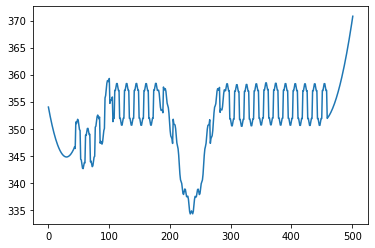

============== Row:283 Index:283 ============== (True:passing Predict:nothing )


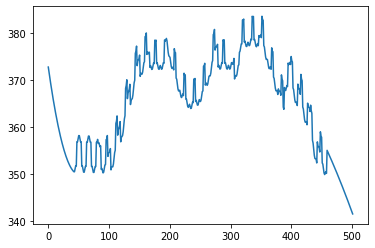

============== Row:284 Index:284 ============== (True:passing Predict:touching )


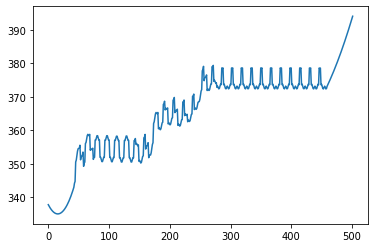

============== Row:286 Index:286 ============== (True:nothing Predict:touching )


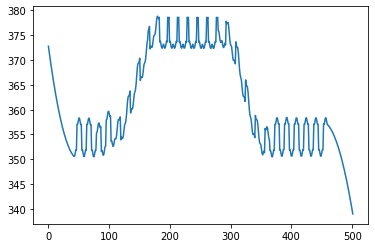

============== Row:287 Index:287 ============== (True:touching Predict:passing )


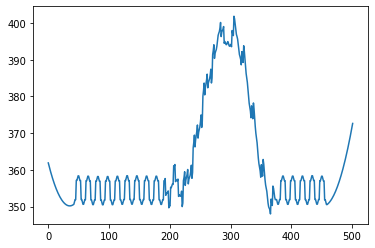

============== Row:288 Index:288 ============== (True:touching Predict:nothing )


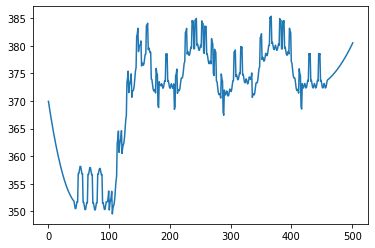

============== Row:289 Index:289 ============== (True:touching Predict:nothing )


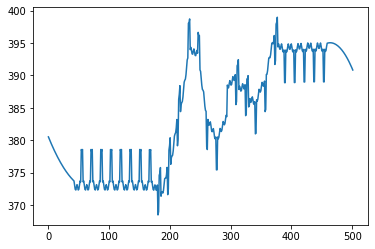

============== Row:290 Index:290 ============== (True:touching Predict:nothing )


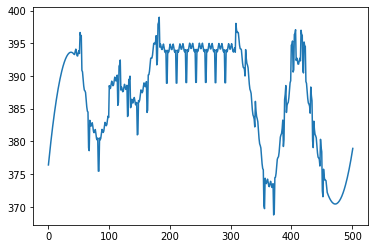

============== Row:291 Index:291 ============== (True:touching Predict:nothing )


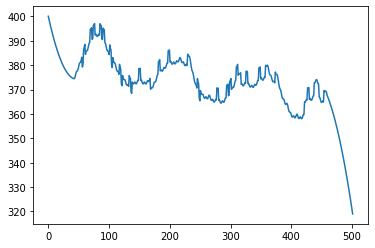

============== Row:296 Index:296 ============== (True:passing Predict:nothing )


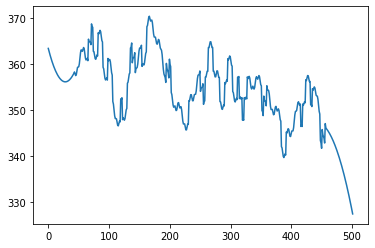

============== Row:297 Index:297 ============== (True:touching Predict:nothing )


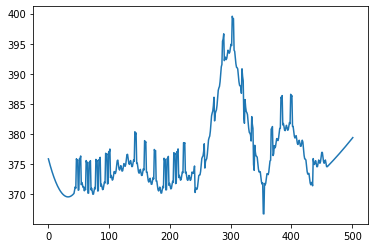

============== Row:298 Index:298 ============== (True:touching Predict:nothing )


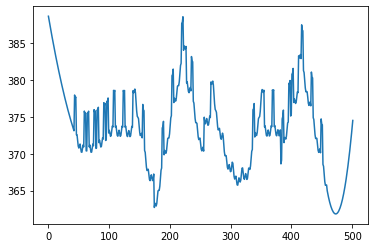

============== Row:299 Index:299 ============== (True:touching Predict:nothing )


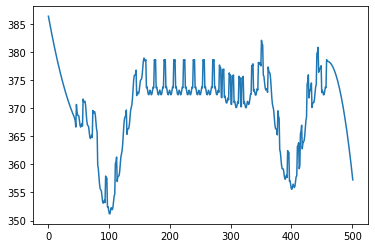

============== Row:300 Index:300 ============== (True:touching Predict:nothing )


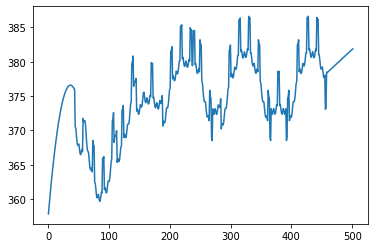

============== Row:301 Index:301 ============== (True:touching Predict:nothing )


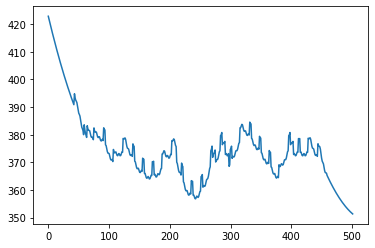

============== Row:302 Index:302 ============== (True:touching Predict:nothing )


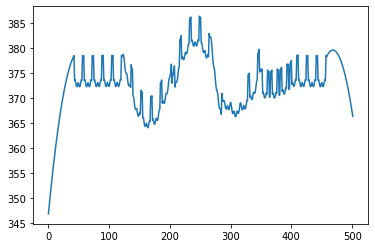

============== Row:304 Index:304 ============== (True:touching Predict:nothing )


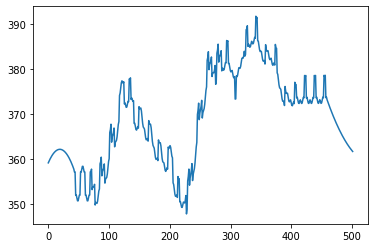

============== Row:305 Index:305 ============== (True:touching Predict:nothing )


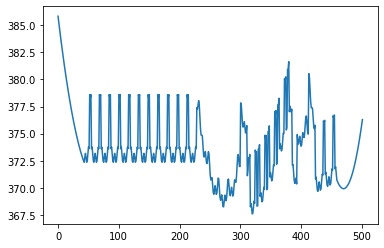

In [8]:
# x = np.linspace(0, len(df.iloc[0]) - 1, len(df.iloc[0]) - 1)
# for i in range(len(y_test)):
#     if y_pred[i] != y_test[i]:
#         idx = y_test_index[i]
#         print("============== Row:{:03d} Index:{} ============== (True:{} Predict:{} )".format(i, idx, y_test[i], y_pred[i]))
#         y = df.iloc[idx, :-1]
#         y = savgol_filter(y, 85, 2)
#         plt.plot(x, y)
#         plt.show()